# Class Activity 2. Linear Regression
## by Alejandro Puerto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## 1. Simulation

In [2]:
np.random.seed(0)

In [3]:
x = np.random.rand(100,1)
y = 2 + 3*x + np.random.rand(100,1)

In [4]:
xline= np.linspace(0,1,100)
yline = 2.5 + 3*xline

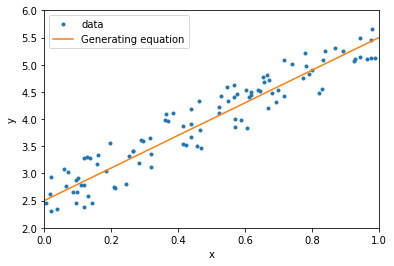

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, '.', label='data')
ax.plot(xline, yline, '-', label='Generating equation')
ax.set(xlabel='x', ylabel='y')
ax.set_xlim([0,1]) # plt.xlim(0,1)
ax.set_ylim([2,6]) # plt.ylim(2,6)
ax.legend()
plt.show()

1.a

In [6]:
def y_predictor(x, beta):
    """
    y_predictor for simple linear regression
    """
    y_retVal = beta[0] + beta[1] * x
    return y_retVal

1.b

In [7]:
def J(y_prediction, y_real):
    """
    Mean Squared Error
    """
    N = len(y_real)
    J_retVal = ((y_prediction - y_real)**2).sum() * (1/(2 * N))
    return J_retVal

In [8]:
beta = [1,2]

In [9]:
y_prediction = y_predictor(x, beta)

In [10]:
J_value = J(y_prediction, y)

In [11]:
J_value

2.0763206748466168

1.c

In [12]:
beta_0 = []
beta_1 = []
error_3D = []

for item_0 in np.linspace(0, 5, 20):
    for item_1 in np.linspace(0, 6, 20):
        y_prediction = y_predictor(x, [item_0, item_1])
        ev = J(y_prediction, y)
        beta_0.append(item_0)
        beta_1.append(item_1)
        error_3D.append(ev)

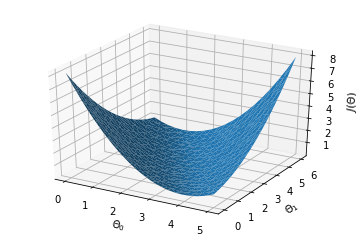

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(beta_0, beta_1, error_3D)

ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

plt.show()

## 2. Analytical solution

In [14]:
# Number of observations
N = x.shape[0] # len(x)

In [15]:
# setting x_train
x_train = np.c_[np.ones(N), x]

2.a

In [16]:
# b=[x^T x]^-1 x^t y 
# beta coefficients
beta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), np.dot(x_train.T, y))

In [17]:
for i in range(2):
    print("beta_{} = {}".format(i, beta[i]))

beta_0 = [2.55808002]
beta_1 = [2.93655106]


In [18]:
y_train = np.dot(x_train, beta)

2.b

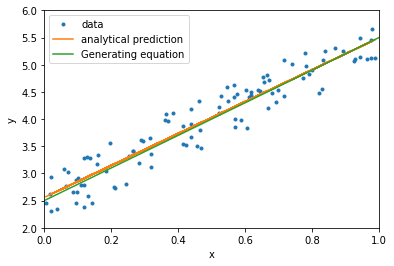

In [19]:
fig, ax = plt.subplots()
ax.plot(x, y, '.', label='data')
ax.plot(x, y_train, '-', label='analytical prediction')
ax.plot(xline, yline, '-', label='Generating equation')
ax.set(xlabel='x', ylabel='y')
ax.set_xlim([0,1]) # plt.xlim(0,1)
ax.set_ylim([2,6]) # plt.ylim(2,6)
ax.legend()
plt.show()

2.c Making predictions of x values

 
 Predict the predictions (y-values) of the following x-values:
 
| x |
|---|
|0.11|
|0.23|
|0.47|
|0.65|
|0.84|

In [20]:
x_new = [0.11, 0.23, 0.47, 0.65, 0.84]
x_new = np.c_[np.ones(len(x_new)), x_new]
y_new = np.dot(x_new, beta)

In [21]:
print(y_new)

[[2.88110064]
 [3.23348677]
 [3.93825902]
 [4.46683821]
 [5.02478291]]


## 3. Gradient Descent

3.a

In [22]:
def lr_gd(x_train, lr, n_iter):
    """
    Function which estimates the value of 𝛽* by applying GDA to minimize the cost function in linear regression.
    
    Input:
    x_train: the training values of x
    lr: learning rate
    n_iter: number of iterations
    
    Output:
    beta_gd: 𝛽*
    rmse_error: root mean squared error
    """
    rmse_error = []
    N, M = x_train.shape #size of beta vector
    beta_gd = np.zeros((M,1)) # beta initialization
    #gradient descent optimization
    for i in range(n_iter): 
        y_predictor = np.dot(x_train, beta_gd)
        residuals = y_predictor - y
        rmse_error.append(np.sqrt((residuals**2).sum()/N))
        gradient_vector = np.dot(x_train.T, residuals)/N
        beta_gd = beta_gd - lr * gradient_vector
        
    return beta_gd, rmse_error

In [23]:
beta_gd, rmse_error = lr_gd(x_train, lr = 0.5, n_iter = 100)

3.b

In [24]:
beta_gd

array([[2.57992984],
       [2.89343557]])

In [25]:
y_prediction_gd = y_predictor(x, beta_gd)
J_value = J(y_prediction_gd, y)
J_value

0.03819495188451939

3.c

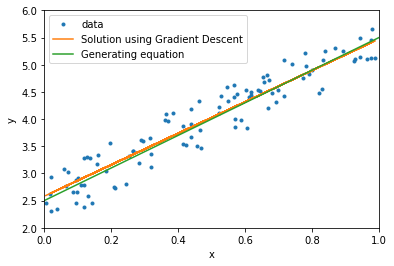

In [26]:
fig, ax = plt.subplots()
ax.plot(x, y, '.', label='data')
ax.plot(x, y_prediction_gd, '-', label='Solution using Gradient Descent')
ax.plot(xline, yline, '-', label='Generating equation')
ax.set(xlabel='x', ylabel='y')
ax.set_xlim([0,1])
ax.set_ylim([2,6])
ax.legend()
plt.show()

3.d

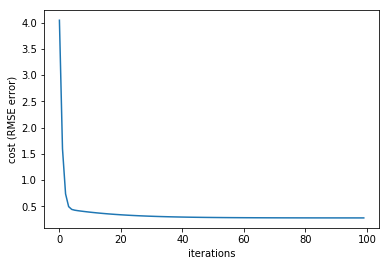

In [27]:
fig, ax = plt.subplots()
ax.plot(rmse_error)
ax.set(xlabel = 'iterations', ylabel = 'cost (RMSE error)')
plt.show()

In [28]:
#Making predictions with Beta (gradient descent)
y_new_gd = np.dot(x_new, beta_gd)
y_new_gd

array([[2.89820775],
       [3.24542002],
       [3.93984456],
       [4.46066296],
       [5.01041572]])

## 4. Sci-Kit Learn Linear Regression

4.a

In [29]:
# Linear regression

#1. model creation
lr = linear_model.LinearRegression()

#2. Model fitting
lr.fit(x, y)

#3. prediction
data_prediction = lr.predict(x)

In [30]:
lr.coef_

array([[2.93655106]])

In [31]:
lr.intercept_

array([2.55808002])

4.b

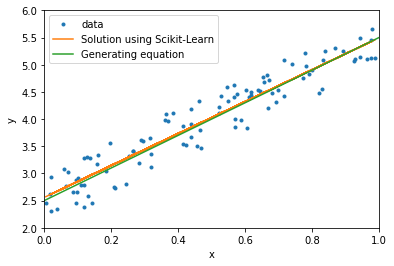

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y, '.', label='data')
ax.plot(x, data_prediction, '-', label='Solution using Scikit-Learn')
ax.plot(xline, yline, '-', label='Generating equation')
ax.set(xlabel='x', ylabel='y')
ax.set_xlim([0,1])
ax.set_ylim([2,6])
ax.legend()
plt.show()

4.c

In [33]:
x_new = [[0.11, 0.23, 0.47, 0.65, 0.84]]
lr.fit(x_new, np.ones(len(x_new)))
y_prediction = lr.predict(x_new)

In [34]:
print(y_new)

[[2.88110064]
 [3.23348677]
 [3.93825902]
 [4.46683821]
 [5.02478291]]


## 5. Multiple Lineal Regression

In [35]:
np.random.seed(0)

In [36]:
x1 = np.random.rand(100,1)
x2 = np.random.rand(100,1)
y = 2 + 3*x1 + 4*x2 + np.random.rand(100,1)

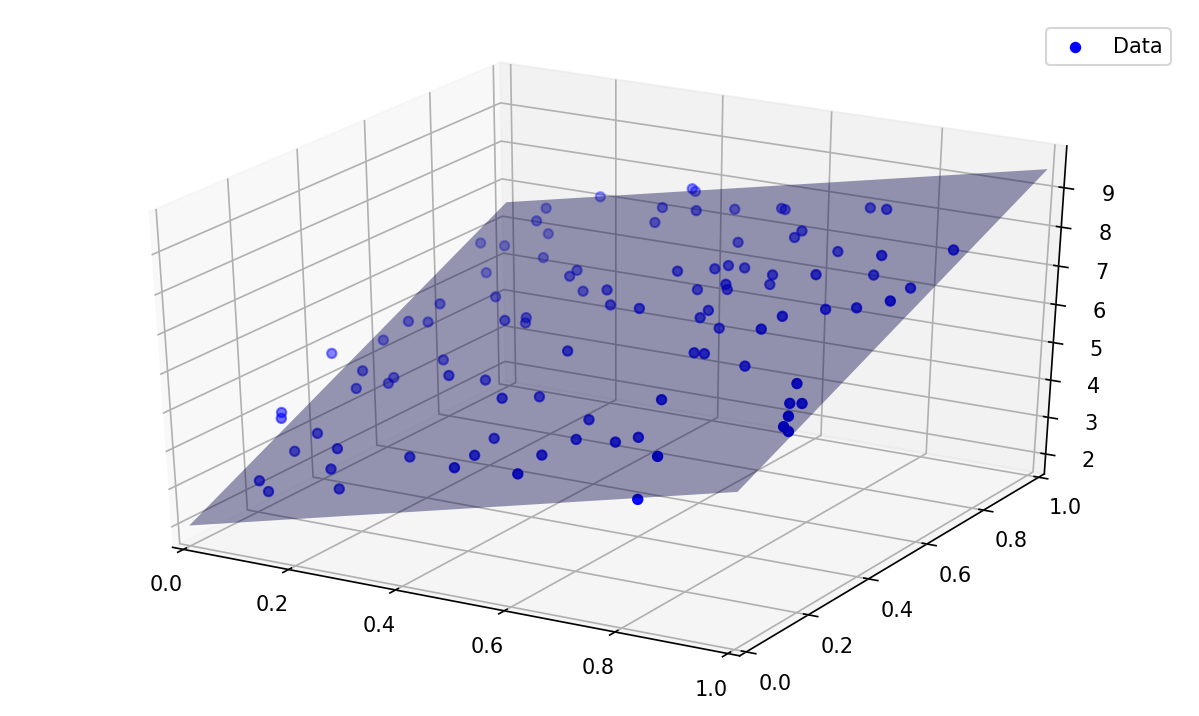

In [37]:
plt.figure(figsize = (10,6), dpi=150)
ax = plt.axes(projection = '3d')
plt.ylim(0,1)
plt.xlim(0,1)
ax.scatter(x1, x2, y, s=20, color = 'blue', label = 'Data')
ax.plot_surface(np.array([[0,1], [0,1]]), np.array([[0,0], [1,1]]), np.array([[2,5.5], [6.5,9.5]]), color = 'darkblue', alpha=0.4)
plt.legend()
plt.show()

In [38]:
x1 = np.ravel(x1)
x2 = np.ravel(x2)

In [39]:
N = x1.shape[0]
N

100

In [40]:
x0 = np.ones(N)

In [41]:
x = pd.DataFrame(list(zip(x1, x2)), columns = ['x1', 'x2'])

In [42]:
x.head()

,x1,x2
0,0.548814,0.677817
1,0.715189,0.270008
2,0.602763,0.735194
3,0.544883,0.962189
4,0.423655,0.248753


In [43]:
x_copy = x.copy()

In [44]:
def y_predictor(x, beta):
    """
    y_predictor for multiple linear regression
    """
    
    y_retVal = beta[0] + beta[1] * x + beta[2] * x**2
    return y_retVal

### 5.a Analytical Solution

In [45]:
x_train = x_copy

In [46]:
x_train.insert(loc = 0, column = 'x0', value = x0, allow_duplicates = True)

In [47]:
beta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), np.dot(x_train.T, y))

In [48]:
for i in range(len(beta)):
    print("beta_{} = {}".format(i, beta[i]))

beta_0 = [2.60497806]
beta_1 = [2.95300697]
beta_2 = [3.86152133]


In [49]:
y_train = np.dot(x_train, beta)

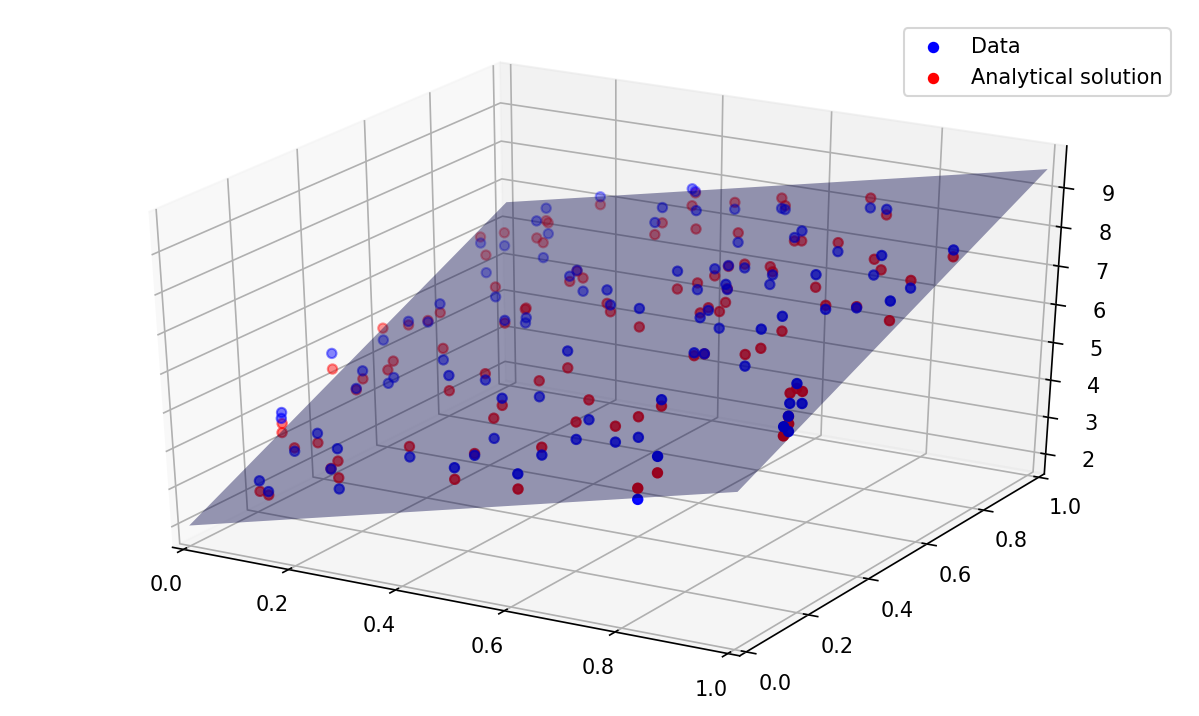

In [50]:
plt.figure(figsize = (10,6), dpi=150)
ax = plt.axes(projection = '3d')
plt.ylim(0,1)
plt.xlim(0,1)
ax.scatter(x1, x2, y, s=20, color = 'blue', label = 'Data')
ax.plot_surface(np.array([[0,1], [0,1]]), np.array([[0,0], [1,1]]), np.array([[2,5.5], [6.5,9.5]]), color = 'darkblue', alpha=0.4)
ax.scatter3D(x1, x2, y_train, s=20, color = 'red', label = 'Analytical solution')
plt.legend()
plt.show()

### 5.b Gradient Descent Solution

In [51]:
beta_gd, rmse_error = lr_gd(x_train, lr = 0.5, n_iter = 100)

In [52]:
print(beta_gd) #New values of beta

[[2.72538645]
 [2.8562035 ]
 [3.73122078]]


In [53]:
y_prediction_gd = y_predictor(x, beta_gd)

In [54]:
y_prediction_gd.head()

,x1,x2
0,5.416739,6.375623
1,6.676617,3.768606
2,5.802642,6.842013
3,5.389475,8.927982
4,4.605123,3.666757


### 5.c Sci-Kit Learn Implementation

In [55]:
# Linear regression

#1. model creation
lr = linear_model.LinearRegression()

#2. Model fitting
lr.fit(x, y)

#3. prediction
data_prediction = lr.predict(x)

In [56]:
lr.coef_

array([[2.95300697, 3.86152133]])

In [57]:
lr.intercept_

array([2.60497806])

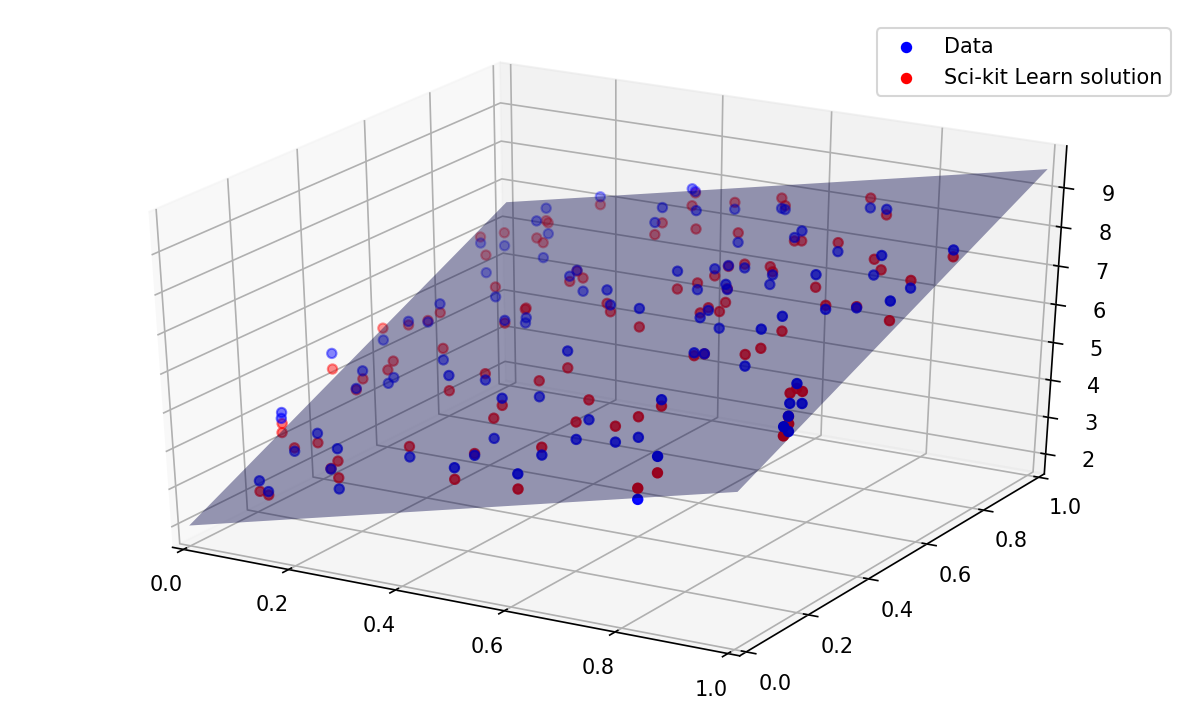

In [58]:
plt.figure(figsize = (10,6), dpi=150)
ax = plt.axes(projection = '3d')
plt.ylim(0,1)
plt.xlim(0,1)
ax.scatter(x1, x2, y, s=20, color = 'blue', label = 'Data')
ax.plot_surface(np.array([[0,1], [0,1]]), np.array([[0,0], [1,1]]), np.array([[2,5.5], [6.5,9.5]]), color = 'darkblue', alpha=0.4)
ax.scatter3D(x1, x2, data_prediction, s=20, color = 'red', label = 'Sci-kit Learn solution')
plt.legend()
plt.show()

In [59]:
rmse = np.sqrt(mean_squared_error(y, data_prediction))

In [60]:
print(rmse)

0.29904527282022336


The lower the RMSE, the better the fit.